In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [2]:
# Especificar los tipos de datos para cada columna
dtype_dict = {
    "Country Name": str,
    "Country Code": str,
    "Indicator Name": str,
    "Indicator Code": str
}

# Leer el archivo CSV con los tipos de datos especificados
df = pd.read_csv("WDIData.csv", sep=",", decimal=",", dtype=dtype_dict)

# Convertir las columnas numéricas a tipo float
columnas_numericas = df.columns[4:]  # Seleccionar todas las columnas a partir de la quinta
df[columnas_numericas] = df[columnas_numericas].astype(float)

# Verificar el tipo de datos resultante
print(df.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   1960            38880 non-null   float64
 5   1961            44138 non-null   float64
 6   1962            45320 non-null   float64
 7   1963            46200 non-null   float64
 8   1964            46743 non-null   float64
 9   1965            48944 non-null   float64
 10  1966            48946 non-null   float64
 11  1967            49618 non-null   float64
 12  1968            50272 non-null   float64
 13  1969            51035 non-null   float64
 14  1970            68363 non-null   float64
 15  1971            75289 non-null   float64
 16  1972            77209 non-null   float64
 17  1973      

In [4]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN,NaN


In [5]:
df.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1960              356396
                   ...  
2019              180011
2020              201157
2021              230860
2022              290503
Unnamed: 67       395276
Length: 68, dtype: int64

In [6]:
df.shape

(395276, 68)

In [7]:
# Eliminar columna que no necesitamos, la ultima
df.drop(df.columns[-1], axis=1, inplace=True)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN


In [8]:
#Intercambiar NA por -1
df.fillna(-1, inplace= True)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,-1.0
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,-1.0
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,-1.0


In [9]:
# Calcular la proporción de valores -1 en cada columna numérica
proporcion_valores_negativos = (df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']) == -1).mean()

# Definir un umbral para decidir si eliminar la columna
umbral = 0.5  # Por ejemplo, si más del 50% de los valores son -1, eliminaremos la columna

# Filtrar las columnas que superan el umbral
columnas_a_eliminar = proporcion_valores_negativos[proporcion_valores_negativos > umbral].index

# Eliminar las columnas del DataFrame original
df_filtrado = df.drop(columns=columnas_a_eliminar)

In [10]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395276 entries, 0 to 395275
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    395276 non-null  object 
 1   Country Code    395276 non-null  object 
 2   Indicator Name  395276 non-null  object 
 3   Indicator Code  395276 non-null  object 
 4   2004            395276 non-null  float64
 5   2005            395276 non-null  float64
 6   2006            395276 non-null  float64
 7   2007            395276 non-null  float64
 8   2008            395276 non-null  float64
 9   2009            395276 non-null  float64
 10  2010            395276 non-null  float64
 11  2011            395276 non-null  float64
 12  2012            395276 non-null  float64
 13  2013            395276 non-null  float64
 14  2014            395276 non-null  float64
 15  2015            395276 non-null  float64
 16  2016            395276 non-null  float64
 17  2017      

In [13]:
paises_latinoamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

children_out_of_school = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Children out of school, primary')].copy()
employment_to_population_ratio = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Employment to population ratio, ages 15-24, total (%) (national estimate)')].copy()
labor_force_with_basic_education = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_latinoamerica)) & (df_filtrado['Indicator Name'] == 'Labor force with basic education (% of total working-age population with basic education)')].copy()

# Visualizar el subgrupo
labor_force_with_basic_education

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
83905,Argentina,ARG,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,55.899,54.801,54.220,-1.000,52.211,51.913,51.244,51.477,50.865,49.782,49.827,-1.000,-1.000,48.495,48.458,48.750
107681,Bolivia,BOL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,79.281,60.568,64.045,63.339,63.633,63.993,-1.000,66.674,59.246,61.999,65.999,60.833,61.091,62.655,67.708,69.830
112139,Brazil,BRA,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,67.345,67.667,67.187,66.302,65.606,65.597,-1.000,62.303,70.331,69.894,69.380,64.638,50.280,50.224,49.697,49.138
132943,Chile,CHL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,47.885,-1.000,-1.000,45.344,49.258,50.396,49.669,49.349,49.674,49.055,48.321,48.448,47.693,46.912
135915,Colombia,COL,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,60.380,59.725,-1.000,58.997,59.122,62.248,62.514,62.504,62.996,61.498,60.942,60.592,59.528,59.178,57.874,56.539
141859,Costa Rica,CRI,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,56.724,59.520,58.738,59.350,60.323,59.919,56.830,57.908,62.352,61.112,61.323,60.858,56.695,57.386,60.369,61.115
146317,Cuba,CUB,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,37.180,35.660,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
156719,Dominican Republic,DOM,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,53.685,53.320,53.718,54.203,52.889,51.152,52.680,54.022,54.516,54.155,55.046,58.184,58.023,57.518,58.867,59.478
158205,Ecuador,ECU,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,66.251,65.675,67.200,63.346,63.252,60.223,58.986,57.095,57.638,57.607,57.762,61.044,63.111,63.635,62.074,61.371
161177,El Salvador,SLV,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,59.765,60.283,60.864,60.385,59.857,58.850,59.353,59.177,58.313,59.884


In [16]:
columnas_a_eliminar = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

In [17]:
children_out_of_school_variables = children_out_of_school.drop(columns=columnas_a_eliminar)
children_out_of_school_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.0000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,31630.555556,34520.944444,32366.0000,33538.111111,35232.166667,24812.944444,26125.888889,27653.611111,87226.388889,56095.555556,81767.388889,90659.833333,99776.388889,94897.277778,93981.555556,87098.555556
std,55185.357490,55035.939479,49403.0913,49169.701231,47615.800512,44064.875563,43804.889712,44485.749040,209916.184529,142434.753144,151102.370698,162410.080312,157341.749809,153435.661757,172174.394512,151469.686472
min,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,1122.000000,1812.5000,3331.500000,2982.000000,-1.000000,687.750000,2092.250000,4717.500000,-1.000000,3383.500000,5461.250000,18525.250000,5407.000000,111.500000,4369.250000
50%,5322.500000,8819.500000,9529.5000,15041.000000,14644.000000,10716.500000,11598.500000,15004.500000,20148.500000,9268.500000,27655.500000,38172.500000,39244.500000,32578.500000,25187.500000,26317.500000
75%,34602.250000,35260.250000,26800.5000,45631.750000,46440.000000,23143.500000,23984.750000,27609.500000,63532.250000,34077.750000,46518.500000,52176.000000,88836.750000,126920.500000,119569.250000,59118.000000
max,170852.000000,160655.000000,170671.0000,188207.000000,157861.000000,183896.000000,182475.000000,187502.000000,896213.000000,602121.000000,600337.000000,658888.000000,630849.000000,619485.000000,709047.000000,612571.000000


In [18]:
employment_to_population_ratio_variables = employment_to_population_ratio.drop(columns=columnas_a_eliminar)
employment_to_population_ratio_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,28.880056,31.088000,29.576333,27.098667,31.902278,33.664000,32.830278,38.241389,42.307278,37.881444,40.248000,34.942278,34.472056,36.295278,36.648833,36.334611
std,23.219529,21.686454,23.435819,24.075678,22.265070,20.731702,20.050106,16.223698,14.188031,15.896582,12.584025,17.557612,17.445819,15.327454,15.604894,15.851192
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,6.178250,-1.000000,-1.000000,6.789250,29.408500,31.217000,34.271750,37.851750,34.820000,36.560500,35.935250,34.473500,34.469750,34.543500,32.040250
50%,35.811500,39.071000,37.504500,37.172000,39.672000,41.029500,40.210500,41.869000,43.070500,42.143500,41.929000,40.105500,40.371500,40.111500,39.834000,39.309000
75%,47.102250,47.233500,49.166000,45.838500,46.543750,46.406750,42.618750,48.407750,47.252500,46.160250,47.381750,43.845250,41.480000,41.814750,45.112750,47.445750
max,62.349000,57.665000,61.307000,62.711000,63.434000,63.801000,64.450000,63.051000,64.812000,61.262000,59.418000,56.574000,55.658000,57.107000,56.961000,57.652000


In [19]:
labor_force_with_basic_education_variables = labor_force_with_basic_education.drop(columns=columnas_a_eliminar)
labor_force_with_basic_education_variables.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,42.340722,43.849833,47.090444,41.000833,43.943667,48.587167,48.005833,53.294889,58.327222,53.474056,57.337056,50.394333,49.667389,52.498833,49.198667,49.217611
std,32.210293,29.001727,27.160322,30.953129,29.145806,24.354284,23.977985,20.689774,16.653387,20.773281,15.809318,24.125129,23.997499,20.479943,24.002014,24.043282
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,12.580000,49.343250,-1.000000,12.302750,46.796000,49.754500,54.094250,55.932500,54.694250,56.695250,56.037500,51.664000,51.397000,48.767750,48.847000
50%,56.942000,58.402500,57.784000,57.415000,58.813500,58.282000,57.456500,57.981500,60.055000,59.544000,60.869000,60.608000,58.688000,58.347500,58.093500,58.802500
75%,67.071500,60.357250,64.951000,63.344250,62.853500,62.513500,60.866000,62.813750,66.394000,61.873750,63.051250,61.380750,61.906750,63.051000,61.845500,61.307000
max,79.281000,72.416000,75.085000,76.267000,76.247000,76.534000,77.359000,76.569000,76.364000,75.463000,74.820000,73.843000,74.629000,74.765000,74.357000,74.076000


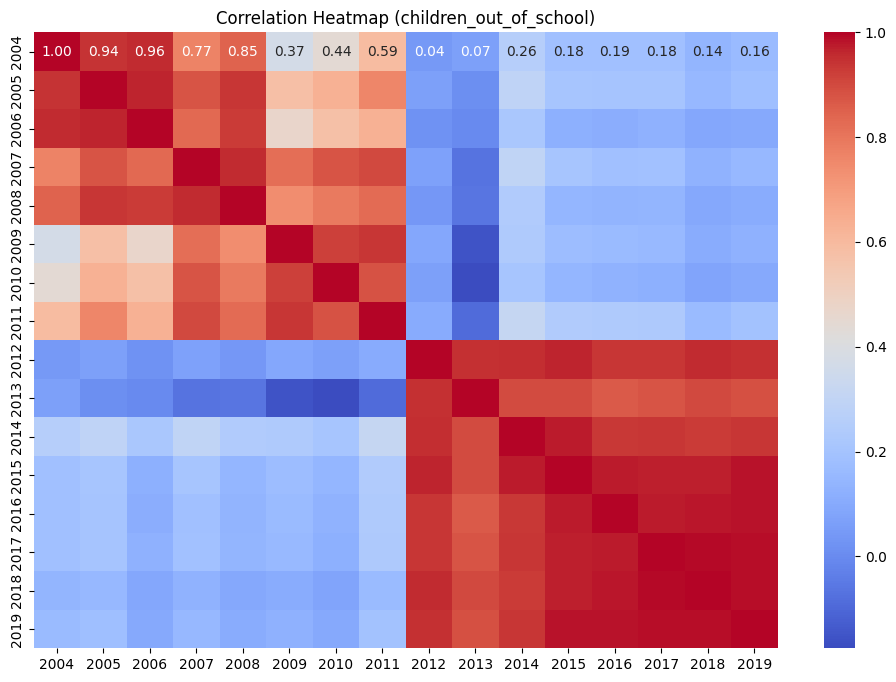

In [24]:
# Calcular la matriz de correlación
correlation_matrix = children_out_of_school_variables.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor de Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (children_out_of_school)')
plt.show()


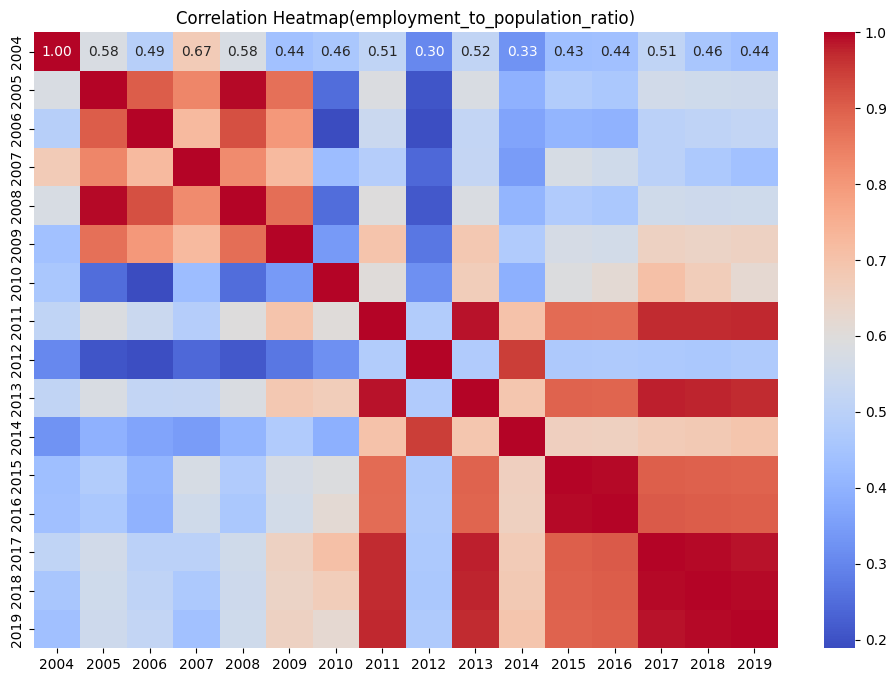

In [25]:
# Calcular la matriz de correlación
correlation_matrix = employment_to_population_ratio_variables.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor de Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap(employment_to_population_ratio)')
plt.show()

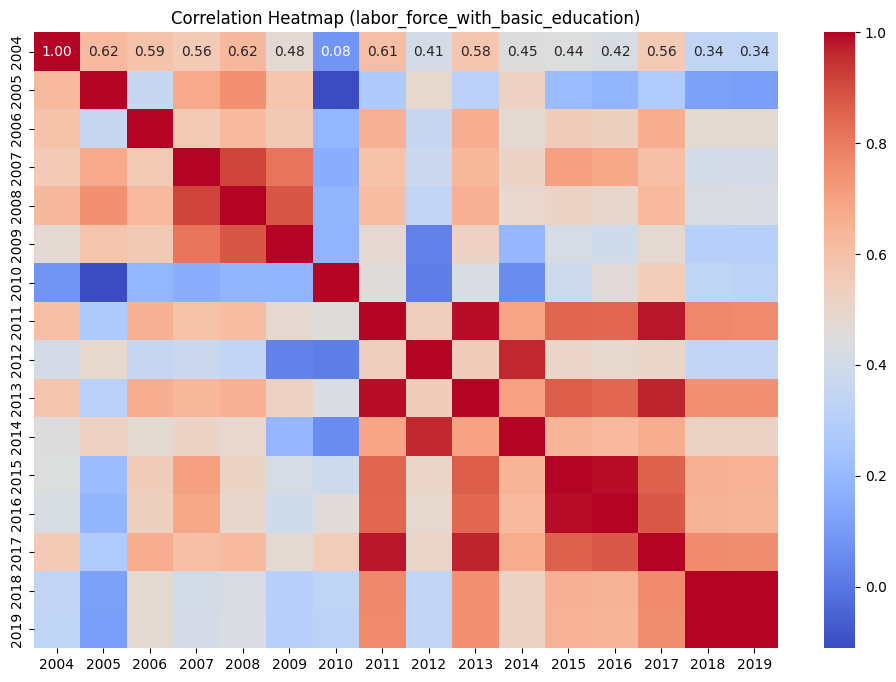

In [26]:
# Calcular la matriz de correlación
correlation_matrix = labor_force_with_basic_education_variables.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor de Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (labor_force_with_basic_education)')
plt.show()

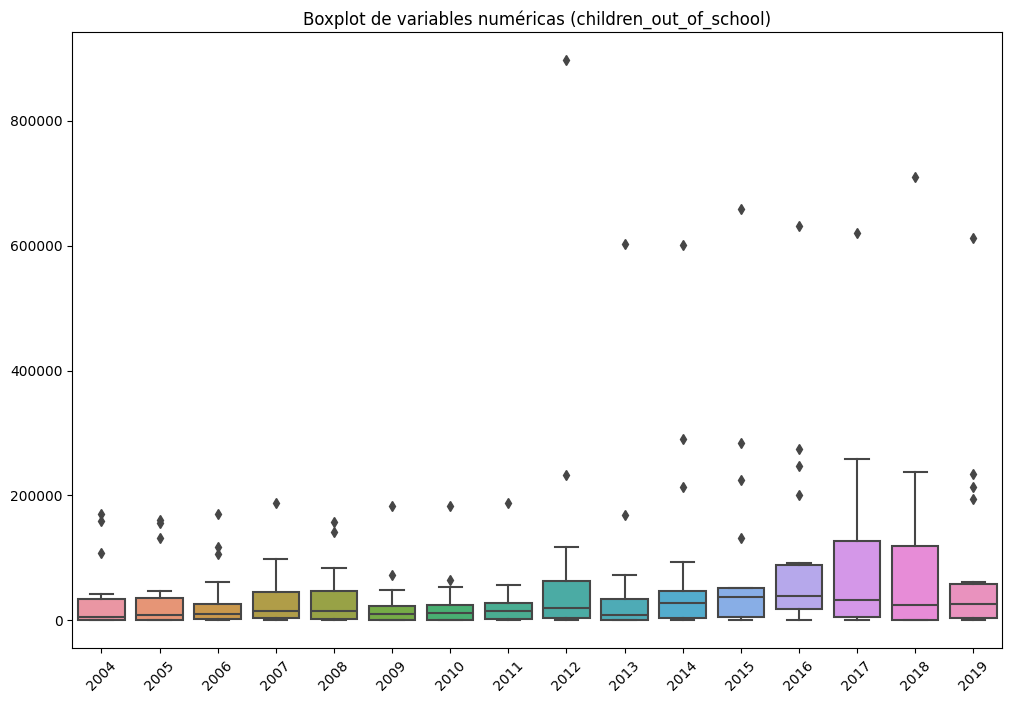

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=children_out_of_school_variables)
plt.title('Boxplot de variables numéricas (children_out_of_school)')
plt.xticks(rotation=45)
plt.show()

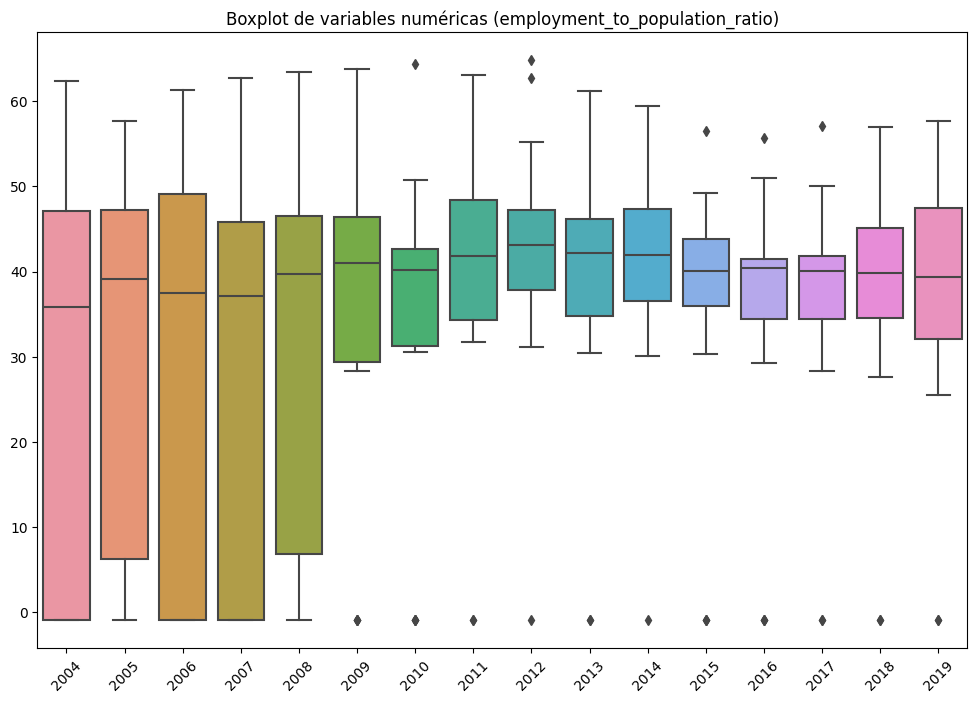

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=employment_to_population_ratio_variables)
plt.title('Boxplot de variables numéricas (employment_to_population_ratio)')
plt.xticks(rotation=45)
plt.show()

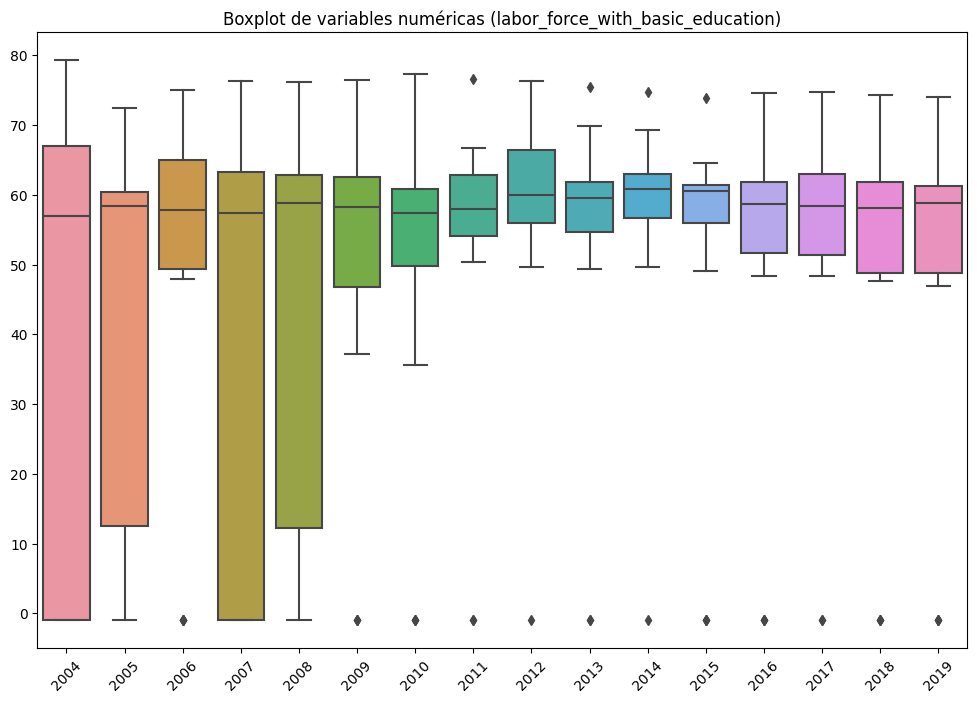

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=labor_force_with_basic_education_variables)
plt.title('Boxplot de variables numéricas (labor_force_with_basic_education)')
plt.xticks(rotation=45)
plt.show()

In [41]:
paises_CARCA = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']

CARCAchildren_out_of_school = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_CARCA)) & (df_filtrado['Indicator Name'] == 'Children out of school, primary')].copy()
CARCAemployment_to_population_ratio = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_CARCA)) & (df_filtrado['Indicator Name'] == 'Employment to population ratio, ages 15-24, total (%) (national estimate)')].copy()
CARCAlabor_force_with_basic_education = df_filtrado.loc[(df_filtrado['Country Name'].isin(paises_CARCA)) & (df_filtrado['Indicator Name'] == 'Labor force with basic education (% of total working-age population with basic education)')].copy()

In [38]:
CARCAchildren_out_of_school

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
101228,Belize,BLZ,"Children out of school, primary",SE.PRM.UNER,556.0,91.0,218.0,553.0,662.0,839.0,774.0,765.0,253.0,28.0,237.0,175.0,224.0,104.0,193.0,420.0
141350,Costa Rica,CRI,"Children out of school, primary",SE.PRM.UNER,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1608.0,6720.0,13479.0,22764.0,26205.0,25018.0,30759.0,16668.0,13067.0
160668,El Salvador,SLV,"Children out of school, primary",SE.PRM.UNER,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,47814.0,51537.0,56092.0,-1.0,-1.0,-1.0
191874,Guatemala,GTM,"Children out of school, primary",SE.PRM.UNER,158612.0,132451.0,106371.0,85554.0,83648.0,-1.0,-1.0,57393.0,117369.0,168654.0,212849.0,224221.0,246387.0,229971.0,208885.0,213999.0
199304,Honduras,HND,"Children out of school, primary",SE.PRM.UNER,107329.0,160655.0,116980.0,188207.0,157861.0,183896.0,182475.0,187502.0,232196.0,-1.0,290330.0,284763.0,274480.0,257593.0,237868.0,234549.0
284006,Nicaragua,NIC,"Children out of school, primary",SE.PRM.UNER,42126.0,37327.0,62236.0,65442.0,58228.0,-1.0,64830.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
297380,Panama,PAN,"Children out of school, primary",SE.PRM.UNER,1229.0,1374.0,865.0,926.0,1177.0,11254.0,9856.0,15546.0,19702.0,27297.0,37497.0,44668.0,-1.0,57668.0,-1.0,51939.0


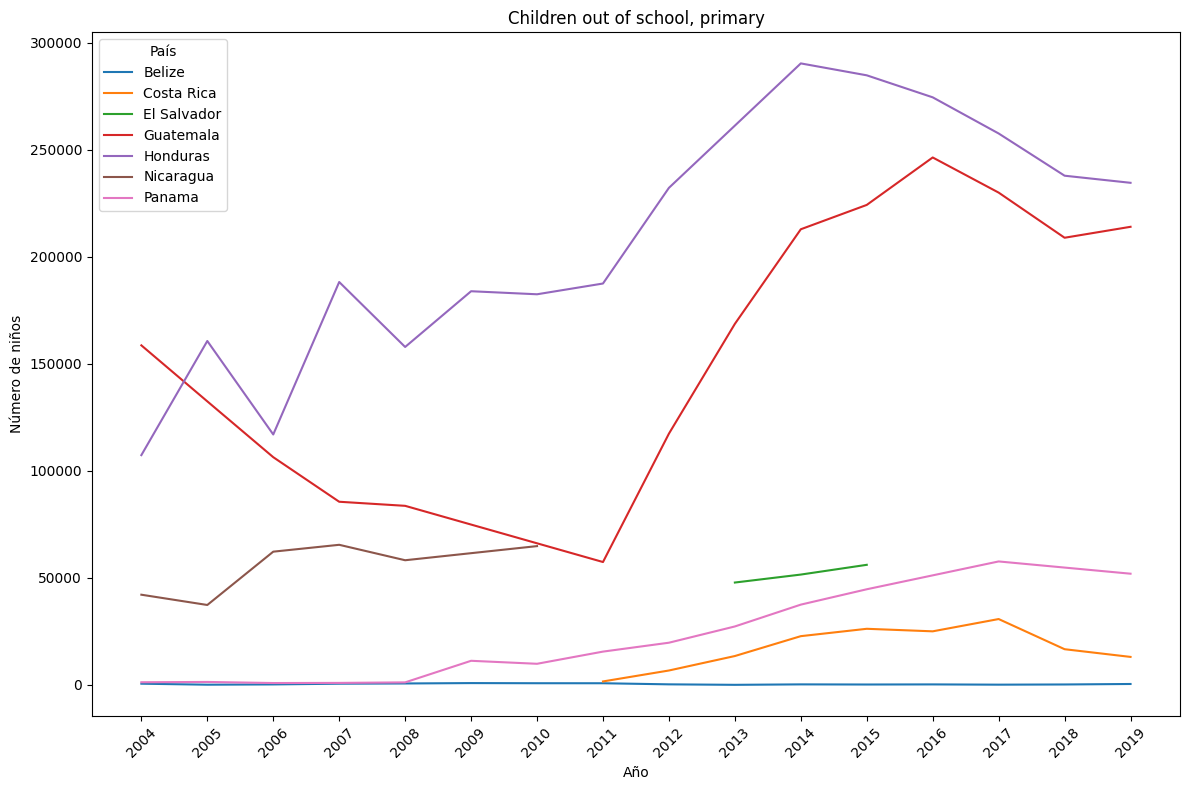

In [48]:
# Datos proporcionados
data = {
    'Country Name': ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama'],
    '2004': [556.0, -1.0, -1.0, 158612.0, 107329.0, 42126.0, 1229.0],
    '2005': [91.0, -1.0, -1.0, 132451.0, 160655.0, 37327.0, 1374.0],
    '2006': [218.0, -1.0, -1.0, 106371.0, 116980.0, 62236.0, 865.0],
    '2007': [553.0, -1.0, -1.0, 85554.0, 188207.0, 65442.0, 926.0],
    '2008': [662.0, -1.0, -1.0, 83648.0, 157861.0, 58228.0, 1177.0],
    '2009': [839.0, -1.0, -1.0, -1.0, 183896.0, -1.0, 11254.0],
    '2010': [774.0, -1.0, -1.0, -1.0, 182475.0, 64830.0, 9856.0],
    '2011': [765.0, 1608.0, -1.0, 57393.0, 187502.0, -1.0, 15546.0],
    '2012': [253.0, 6720.0, -1.0, 117369.0, 232196.0, -1.0, 19702.0],
    '2013': [28.0, 13479.0, 47814.0, 168654.0, -1.0, -1.0, 27297.0],
    '2014': [237.0, 22764.0, 51537.0, 212849.0, 290330.0, -1.0, 37497.0],
    '2015': [175.0, 26205.0, 56092.0, 224221.0, 284763.0, -1.0, 44668.0],
    '2016': [224.0, 25018.0, -1.0, 246387.0, 274480.0, -1.0, -1.0],
    '2017': [104.0, 30759.0, -1.0, 229971.0, 257593.0, -1.0, 57668.0],
    '2018': [193.0, 16668.0, -1.0, 208885.0, 237868.0, -1.0, -1.0],
    '2019': [420.0, 13067.0, -1.0, 213999.0, 234549.0, -1.0, 51939.0]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Trazar líneas de regresión para cada país omitiendo los valores -1.00
for country in df['Country Name']:
    country_data = df.loc[df['Country Name'] == country]
    country_data = country_data.replace(-1.0, float('nan'))  # Reemplazar -1.0 con NaN para omitir esos valores
    sns.lineplot(x=country_data.columns[1:], y=country_data.values.flatten()[1:], label=country)

# Añadir leyenda y etiquetas
plt.legend(title='País')
plt.title('Children out of school, primary')
plt.xlabel('Año')
plt.ylabel('Número de niños')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [39]:
CARCAemployment_to_population_ratio

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
101434,Belize,BLZ,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,39.870,38.273,39.221,38.566,38.823,39.744,-1.000,43.599
141556,Costa Rica,CRI,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,40.856,41.586,42.602,45.900,43.691,38.884,37.067,34.063,37.398,37.583,36.691,35.657,33.554,33.917,34.270,31.240
160874,El Salvador,SLV,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,43.400,42.646,43.647,44.035,43.404,41.725,41.643,41.669,41.902,41.878,42.594
192080,Guatemala,GTM,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,52.090,-1.000,-1.000,-1.000,-1.000,-1.000,48.284,49.248,55.176,47.041,48.591,49.264,49.526,49.837,49.917,49.063
199510,Honduras,HND,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,48.099,46.706,45.654,46.701,47.409,47.616,45.887,44.764,47.916,47.412,48.569,46.653,49.041,51.702,49.351
284212,Nicaragua,NIC,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,64.812,-1.000,47.291,-1.000,-1.000,-1.000,-1.000,-1.000
297586,Panama,PAN,"Employment to population ratio, ages 15-24, to...",SL.EMP.1524.SP.NE.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,40.638,38.557,41.498,41.847,39.518,38.129,38.192,37.156,39.168,38.510


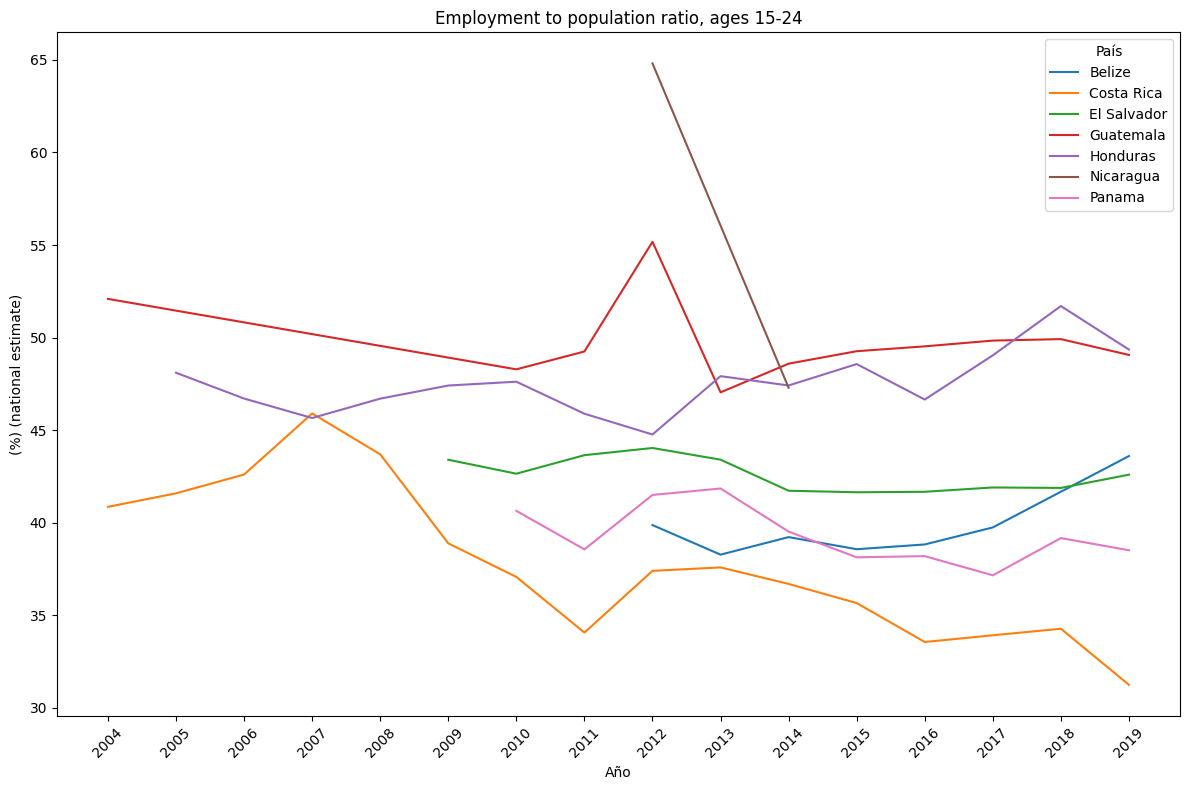

In [49]:
# Datos proporcionados
data = {
    'Country Name': ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama'],
    '2004': [-1.000, 40.856, -1.000, 52.090, -1.000, -1.000, -1.000],
    '2005': [-1.000, 41.586, -1.000, -1.000, 48.099, -1.000, -1.000],
    '2006': [-1.000, 42.602, -1.000, -1.000, 46.706, -1.000, -1.000],
    '2007': [-1.000, 45.900, -1.000, -1.000, 45.654, -1.000, -1.000],
    '2008': [-1.000, 43.691, -1.000, -1.000, 46.701, -1.000, -1.000],
    '2009': [-1.000, 38.884, 43.400, -1.000, 47.409, -1.000, -1.000],
    '2010': [-1.000, 37.067, 42.646, 48.284, 47.616, -1.000, 40.638],
    '2011': [-1.000, 34.063, 43.647, 49.248, 45.887, -1.000, 38.557],
    '2012': [39.870, 37.398, 44.035, 55.176, 44.764, 64.812, 41.498],
    '2013': [38.273, 37.583, 43.404, 47.041, 47.916, -1.000, 41.847],
    '2014': [39.221, 36.691, 41.725, 48.591, 47.412, 47.291, 39.518],
    '2015': [38.566, 35.657, 41.643, 49.264, 48.569, -1.000, 38.129],
    '2016': [38.823, 33.554, 41.669, 49.526, 46.653, -1.000, 38.192],
    '2017': [39.744, 33.917, 41.902, 49.837, 49.041, -1.000, 37.156],
    '2018': [-1.000, 34.270, 41.878, 49.917, 51.702, -1.000, 39.168],
    '2019': [43.599, 31.240, 42.594, 49.063, 49.351, -1.000, 38.510]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Trazar líneas de regresión para cada país omitiendo los valores -1.000
for country in df['Country Name']:
    country_data = df.loc[df['Country Name'] == country]
    country_data = country_data.replace(-1.000, float('nan'))  # Reemplazar -1.000 con NaN para omitir esos valores
    sns.lineplot(x=country_data.columns[1:], y=country_data.values.flatten()[1:], label=country)

# Añadir leyenda y etiquetas
plt.legend(title='País')
plt.title('Employment to population ratio, ages 15-24')
plt.xlabel('Año')
plt.ylabel('(%) (national estimate)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [42]:
CARCAlabor_force_with_basic_education

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
101737,Belize,BLZ,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,63.230,56.684,56.659,56.330,57.536,57.787,-1.000,64.024
141859,Costa Rica,CRI,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,56.724,59.520,58.738,59.350,60.323,59.919,56.830,57.908,62.352,61.112,61.323,60.858,56.695,57.386,60.369,61.115
161177,El Salvador,SLV,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,59.765,60.283,60.864,60.385,59.857,58.850,59.353,59.177,58.313,59.884
192383,Guatemala,GTM,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,68.225,-1.000,65.737,-1.000,-1.000,-1.000,61.233,63.863,67.592,58.703,60.796,60.624,61.111,61.612,61.160,59.580
199813,Honduras,HND,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,59.076,56.843,55.987,57.444,58.393,59.352,57.202,55.988,61.037,63.190,61.493,62.172,63.536,65.764,63.866
284515,Nicaragua,NIC,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,58.758,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,76.364,-1.000,62.599,-1.000,-1.000,-1.000,-1.000,-1.000
297889,Panama,PAN,Labor force with basic education (% of total w...,SL.TLF.BASC.ZS,-1.000,-1.000,56.134,56.197,59.319,57.800,56.973,54.311,55.914,56.312,56.359,55.409,55.816,54.916,56.674,58.127


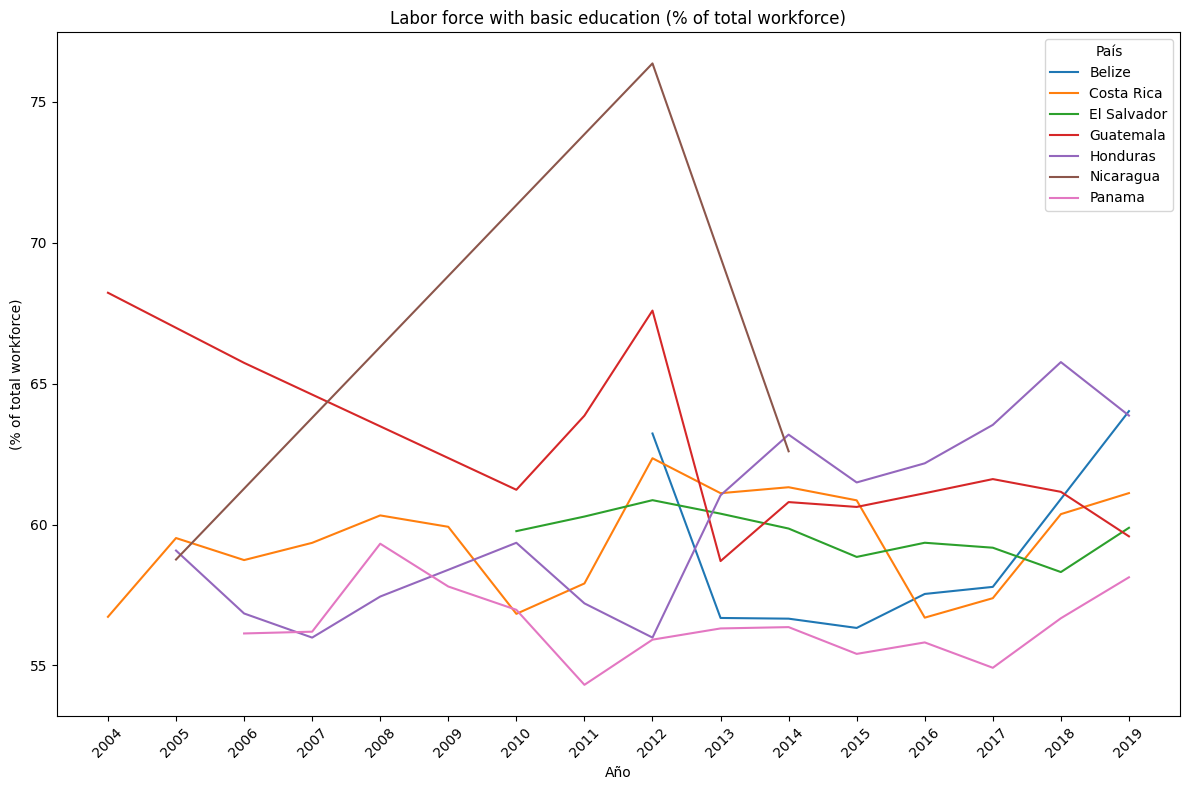

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos proporcionados
data = {
    'Country Name': ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama'],
    '2004': [-1.000, 56.724, -1.000, 68.225, -1.000, -1.000, -1.000],
    '2005': [-1.000, 59.520, -1.000, -1.000, 59.076, 58.758, -1.000],
    '2006': [-1.000, 58.738, -1.000, 65.737, 56.843, -1.000, 56.134],
    '2007': [-1.000, 59.350, -1.000, -1.000, 55.987, -1.000, 56.197],
    '2008': [-1.000, 60.323, -1.000, -1.000, 57.444, -1.000, 59.319],
    '2009': [-1.000, 59.919, -1.000, -1.000, 58.393, -1.000, 57.800],
    '2010': [-1.000, 56.830, 59.765, 61.233, 59.352, -1.000, 56.973],
    '2011': [-1.000, 57.908, 60.283, 63.863, 57.202, -1.000, 54.311],
    '2012': [63.230, 62.352, 60.864, 67.592, 55.988, 76.364, 55.914],
    '2013': [56.684, 61.112, 60.385, 58.703, 61.037, -1.000, 56.312],
    '2014': [56.659, 61.323, 59.857, 60.796, 63.190, 62.599, 56.359],
    '2015': [56.330, 60.858, 58.850, 60.624, 61.493, -1.000, 55.409],
    '2016': [57.536, 56.695, 59.353, 61.111, 62.172, -1.000, 55.816],
    '2017': [57.787, 57.386, 59.177, 61.612, 63.536, -1.000, 54.916],
    '2018': [-1.000, 60.369, 58.313, 61.160, 65.764, -1.000, 56.674],
    '2019': [64.024, 61.115, 59.884, 59.580, 63.866, -1.000, 58.127]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Configurar el gráfico
plt.figure(figsize=(12, 8))

# Trazar líneas de regresión para cada país omitiendo los valores -1.00
for country in df['Country Name']:
    country_data = df.loc[df['Country Name'] == country]
    country_data = country_data.replace(-1.000, float('nan'))  # Reemplazar -1.000 con NaN para omitir esos valores
    sns.lineplot(x=country_data.columns[1:], y=country_data.values.flatten()[1:], label=country)

# Añadir leyenda y etiquetas
plt.legend(title='País')
plt.title('Labor force with basic education (% of total workforce)')
plt.xlabel('Año')
plt.ylabel('(% of total workforce)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()